<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Capstone Project: Investor Risk Tolerance Prediction and Robo-Advisory Dashboard

Project done by - **Anand Ramchandani**

# Background

The aim of this project is to  to create a machine learning model that is able to predict an individual investors risk tolerance. Coupled with the individuals stated willingness to take risk, a robo advisory dashboard will be created using the model to recommend a portfolio based on that predicted risk tolerance.

The target predicted variable is the true Risk Tolerance of the investor. The predictor variables are the other household demographic and financial attributes of the investor.

The dataset used comes from the Survey of Consumer Finances, which is a statistical survey taken by the Federal Reserve every 3 years. It contains the balance sheet, income and other household demographics of families in the United States. The latest dataset was taken in 2019, which covers data on households from 2017 to 2019.
https://www.federalreserve.gov/econres/scfindex.htm

**How do we find the true risk tolerance of the individual?**

- We know that the ratio of risky assets to the total assets of an investor is a measure of the risk tolerance of that investor
- Risky Assets include investments in mutual funds, stocks, bonds, commodities, real estate, etc.
- Risk-Free Assets include checking and savings balances, certificates of deposit, and other cash balances and equivalents
- Using the data obtained in the Survey of Consumer Finances we can calculate the True Risk Tolerance and use that as the target predicted variable

# Problem Statement

The goal of this Capstone Project is to use a machine learning model to predict the risk tolerance of a prospective individual investor and then to use the model to assign a recommended portfolio in a Robo Advisor dashboard based on the investors risk tolerance

Who am I
Who are you presenting this to
What is the problem
Who are the stakeholders (investors, startups, etc)

# Contents

# Project Plan

# Import Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Importing models from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.neural_network import MLPRegressor

# Importing Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

# Importing Libraries for Statistical Models
import statsmodels.api as sm

# Importing Pickle Libraries in order to save the model
from pickle import dump
from pickle import load

# Loading the Data

In [51]:
# Loading Dataset for 2019 Survey of Consumer Finances (SCF) 
data19 = pd.read_csv('data/SCFP2019.csv')
data16 = pd.read_csv('data/SCFP2016.csv')

# Displaying the Data

In [52]:
# Looking at the top 5 rows 
data19.head()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,1,5,3,1,1,1,1,1,2,10400,3000,0,0.0,67195.781504,1018.117902,0.0,43880.881558,14253.650622,8144.943213,0.0,0.0,67195.781504,2,0,1,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000,1,25000,1,0,0,0,0,0,0,0,0,0,0,0,30900.0,317000,0,84000,0,401000,1,33000,0,0,0,33000,1,0,0,0,0,0,0,0,44000,1,0,500000,500000,1,0,0,409900.0,1,0,9900.0,6.100085,1,1,2,1009000,1,4600,1,0,0,1,2,0,0,0,2,0,0,0.0,1100000.0,1,1,0,0,0.0,0,0.0,0.0,0,0,40000,1,1144600.0,1,44600.0,2153600.0,1,0.0,0.0,0,1100000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2153600.0,0.0,0.0,190000.0,0.0,0.0,0.0,0,190000.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,1,5,3,1,1,1,1,1,2,10400,3000,0,0.0,57014.602488,1018.117902,0.0,31459.843158,16289.886425,8144.943213,0.0,0.0,57014.602488,2,0,1,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,

In [53]:
# Looking at the bottom 5 rows 
data19.tail()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
28880,5813,58131,667.098300,1,51,3,5,1,1,0,1,2,5,1,1,1,2,1,1,7800,4440,0,0.0,411319.63223,153735.80314,256565.71120,0.0,0.0,0.0,0.0,0.0,411319.63223,3,1,0,0,0,0,0,0,1,0,0,5,4,3,0,0,0,0,7,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2061000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,98000,1,0,0,0,0,0,0,2159000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,30900.0,0,0,0,0,0,0,0,0,104000,0,104000,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,2263000,1,7200,1,1,1,1,1,0,0,0,1,0,0,0.0,524000.0,1,1,835000,1,400000.0,1,3650000.0,3650000.0,0,1,0,0,5416200.0,1,4892200.0,7679200.0,1,0.0,44000.0,44000,480000.0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,44000.0,1,7635200.0,0.005730,0.106973,123000.0,666000.0,2800000.0,0.0,0,3589000.0,960.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,960.0,960.0,0.0,0.0,0.028007,0.028007,0.0,0.0,0,44000.0,0.0,0,0,0.0,0,0,0,44000.0,0,0,0,0,0,0,0,0,0,0,0,5,6,6,6,3,11,11,11,4,4
28881,5813,58132,678.821856,1,51,3,5,1,1,0,1,2,5,1,1,1,2,1,1,7800,4560,0,0.0,410301.51433,170025.68956,240275.82477,0.0,0.0,0.0,0.0,0.0,410301.51433,3,1,0,0,0,0,0,0,1,0,0,5,4,3,0,0,0,0,7,0,1

In [54]:
# Seeing the shape of the data
data19.shape

(28885, 351)

- We can see 28,885 rows and 351 columns

In [55]:
# Describe the data
data19.describe()

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
count,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,28885.000000,28885.000000,28885.00000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.0,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.000000,28885.00

In [56]:
# Data info
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28885 entries, 0 to 28884
Columns: 351 entries, YY1 to NINCQRTCAT
dtypes: float64(74), int64(277)
memory usage: 77.4 MB


In [57]:
# Checking the data types
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)
data19.dtypes

YY1                int64
Y1                 int64
WGT              float64
HHSEX              int64
AGE                int64
AGECL              int64
EDUC               int64
EDCL               int64
MARRIED            int64
KIDS               int64
LF                 int64
LIFECL             int64
FAMSTRUCT          int64
RACECL             int64
RACECL4            int64
RACE               int64
OCCAT1             int64
OCCAT2             int64
INDCAT             int64
FOODHOME           int64
FOODAWAY           int64
FOODDELV           int64
RENT             float64
INCOME           float64
WAGEINC          float64
BUSSEFARMINC     float64
INTDIVINC        float64
KGINC            float64
SSRETINC         float64
TRANSFOTHINC     float64
PENACCTWD        float64
NORMINC          float64
WSAVED             int64
SAVED              int64
SAVRES1            int64
SAVRES2            int64
SAVRES3            int64
SAVRES4            int64
SAVRES5            int64
SAVRES6            int64


In [58]:
# Checking Null Values
data19.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,WILSH,5
1,YY1,0
2,MRTHEL,0
3,RESDBT,0
4,MORT3,0
5,MORT2,0
6,MORT1,0
7,HOTHLOC,0
8,OTHLOC,0
9,HELOC_YN,0


- Wilshire index of stock prices (WILSH) has 5 null values

# Data Dictionary

Source of Data Dictionary:  
https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbkfx0.htm

| Column Name                                                                                    | Description                                                                                                                               |
| ---------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------- |
| [ACTBUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ACTBUS)             | Total value of actively managed business(es), 2019 dollars                                                                                |
| [AGE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGE)                   | Age of reference person                                                                                                                   |
| [AGECL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#AGECL)               | Age group of the reference person                                                                                                         |
| [ANNUIT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANNUIT)             | Amount R would receive if they cashed in annuities, 2019 dollars                                                                          |
| [ANYPEN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ANYPEN)             | Pension exists for either reference person or spouse                                                                                      |
| [ASSET](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSET)               | Total value of assets held by household, 2019 dollars                                                                                     |
| [ASSETCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ASSETCAT)         | Asset percentile groups                                                                                                                   |
| [BCALL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BCALL)               | Information used for borrowing decisions: call around                                                                                     |
| [BDONT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BDONT)               | Information used for borrowing decisions: never borrow                                                                                    |
| [BFINPLAN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPLAN)         | Information used for borrowing decisions: lawyer, accountant, financial planner                                                           |
| [BFINPRO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFINPRO)           | Information used for borrowing decisions: banker, broker, real estate broker, builder, dealer, insurance agent                            |
| [BFRIENDWORK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BFRIENDWORK)   | Information used for borrowing decisions: friends, material from work/business contacts                                                   |
| [BINTERNET](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BINTERNET)       | Information used for borrowing decisions: internet/online service                                                                         |
| [BMAGZNEWS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAGZNEWS)       | Information used for borrowing decisions: magazines, newspapers, books                                                                    |
| [BMAILADTV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BMAILADTV)       | Information used for borrowing decisions: material in mail, tv, radio, advertisements, telemarketer                                       |
| [BNKRUPLAST5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#BNKRUPLAST5)   | Household has declared bankruptcy in the past 5 years                                                                                     |
| [BOND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BOND)                 | Total value of directly held bonds held by household, 2019 dollars                                                                        |
| [BOTHER](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BOTHER)             | Information used for borrowing decisions: other sources                                                                                   |
| [BPLANCJ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BPLANCJ)           | Either reference person or spouse/partner has both types of pension plan on a current job                                                 |
| [BSELF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSELF)               | Information used for borrowing decisions: self, shop around, other personal research                                                      |
| [BSHOPGRDL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPGRDL)       | Shopping for borrowing and credit: great deal of shopping                                                                                 |
| [BSHOPMODR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPMODR)       | Shopping for borrowing and credit: moderate shopping                                                                                      |
| [BSHOPNONE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#BSHOPNONE)       | Shopping for borrowing and credit: almost no shopping                                                                                     |
| [BUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUS)                   | Total value of business(es) in which the household has either an active or nonactive interest, 2019 dollars                               |
| [BUSSEFARMINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#BUSSEFARMINC) | Income from business, sole proprietorship, and farm, 2019 dollars                                                                         |
| [BUSVEH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BUSVEH)             | Household has vehicle(s) owned by business                                                                                                |
| [CALL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CALL)                 | Total value of call accounts held by household, 2019 dollars                                                                              |
| [CANTMANG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CANTMANG)         | Why no checking account: can't manage/balance a checking account                                                                          |
| [CASEID](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CASEID)             | Case ID (numeric)                                                                                                                         |
| [CASHLI](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CASHLI)             | Total cash value of whole life insurance held by household, 2019 dollars                                                                  |
| [CCBAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#CCBAL)               | Total value of credit card balances held by household, 2019 dollars                                                                       |
| [CDS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CDS)                   | Total value of certificates of deposit held by household, 2019 dollars                                                                    |
| [CHECKING](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CHECKING)         | Total value of checking accounts held by household, 2019 dollars                                                                          |
| [CKCONNECTN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONNECTN)     | Why chose main checking account institution: connection through work/school                                                               |
| [CKCONVPAYRL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKCONVPAYRL)   | Why chose main checking account institution: other convenience, payroll deduction/direct deposit                                          |
| [CKLOCATION](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOCATION)     | Why chose main checking account institution: location of their offices                                                                    |
| [CKLONGTIME](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLONGTIME)     | Why chose main checking account institution: always done business there, banked there a long time                                         |
| [CKLOWFEEBAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKLOWFEEBAL)   | Why chose main checking account institution: had the lowest fees/minimum balance requirement                                              |
| [CKMANYSVCS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKMANYSVCS)     | Why chose main checking account institution: able to obtain many services at one place                                                    |
| [CKOTHCHOOSE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKOTHCHOOSE)   | Why chose main checking account institution: other reason                                                                                 |
| [CKPERSONAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKPERSONAL)     | Why chose main checking account institution: personal relationship                                                                        |
| [CKRECOMFRND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKRECOMFRND)   | Why chose main checking account institution: recommended, friend/family has account there                                                 |
| [CKSAFETY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CKSAFETY)         | Why chose main checking account institution: offered safety and absence of risk                                                           |
| [COMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#COMUTF)             | amount in combination and other mutual funds, 2019 dollars                                                                                |
| [CONSPAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#CONSPAY)           | total monthly consumer debt payments, 2019 dollars                                                                                        |
| [CPI\_DEFL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#CPI_DEFL)        | Deflator Value                                                                                                                            |
| [CREDIT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#CREDIT)             | Why no checking account: credit problems, bankruptcy, does not meet qualifications for an account                                         |
| [CURRPEN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CURRPEN)           | current value in pension, 2019 dollars                                                                                                    |
| [DBPLANCJ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANCJ)         | Either reference person or spouse/partner has a defined benefit pension on a current job                                                  |
| [DBPLANT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DBPLANT)           | Either reference person or spouse/partner has DB plan on current job or some type of pension from a past job to be received in the future |
| [DCPLANCJ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DCPLANCJ)         | Either reference person or spouse/partner has any type of account-based plan on a current job                                             |
| [DEBT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#DEBT)                 | Total value of debt held by household, 2019 dollars                                                                                       |
| [DEBT2INC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#DEBT2INC)         | Ratio of total debt to total income                                                                                                       |
| [DEQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#DEQ)                   | Total value of equity in directly held stocks, stock mutual funds, and combination mutual funds held by household, 2019 dollars           |
| [DONTLIKE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTLIKE)         | Why no checking account: don't like dealing with banks                                                                                    |
| [DONTWANT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWANT)         | Why no checking account: does not want/need a checking account                                                                            |
| [DONTWRIT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#DONTWRIT)         | Why no checking account: don't write enough checks to make it worthwhile                                                                  |
| [EDCL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDCL)                 | Education category of reference person                                                                                                    |
| [EDN\_INST](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#EDN_INST)        | Total value of education loans held by household, 2019 dollars                                                                            |
| [EDUC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EDUC)                 | Highest completed grade by reference person                                                                                               |
| [EHCHKG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#EHCHKG)             | people w/o checking accounts: ever had an account?                                                                                        |
| [EMERGBORR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGBORR)       | Respondent would borrow money in a hypothetical financial emergency                                                                       |
| [EMERGCUT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGCUT)         | Respondent would cut back spending in a hypothetical financial emergency                                                                  |
| [EMERGPSTP](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGPSTP)       | Respondent would postpone payments in a hypothetical financial emergency                                                                  |
| [EMERGSAV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#EMERGSAV)         | Respondent would spend out of savings in a hypothetical financial emergency                                                               |
| [EQUITINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITINC)         | ratio of equity to normal income                                                                                                          |
| [EQUITY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#EQUITY)             | Total value of financial assets held by household that are invested in stock, 2019 dollars                                                |
| [EXPENSHILO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#EXPENSHILO)     | Households overall expenses over last 12 months                                                                                           |
| [FAMSTRUCT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FAMSTRUCT)       | Family structure of household                                                                                                             |
| [FARMBUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#FARMBUS)           | compute value of business part of farm net of outstanding mortgages, 2019 dollars                                                         |
| [FARMBUS\_KG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#FARMBUS_KG)    | capital gains on farm businesses, 2019 dollars                                                                                            |
| [FEARDENIAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FEARDENIAL)     | Household feared being denied credit in the past 5 years                                                                                  |
| [FIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FIN)                   | Total value of financial assets held by household, 2019 dollars                                                                           |
| [FINLIT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#FINLIT)             | Number of financial literacy questions answered correctly                                                                                 |
| [FOODAWAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODAWAY)         | Total amount spent on food away from home, annualized, 2019 dollars                                                                       |
| [FOODDELV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODDELV)         | Total amount spent on food delivered to home, annualized, 2019 dollars                                                                    |
| [FOODHOME](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#FOODHOME)         | Total amount spent on food at home, annualized, 2019 dollars                                                                              |
| [FORECLLAST5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#FORECLLAST5)   | Respondent had a foreclosure in the last five years                                                                                       |
| [FUTPEN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#FUTPEN)             | future pensions (accumulated in an account for the R/S), 2019 dollars                                                                     |
| [GBMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GBMUTF)             | amount in government bond mutual funds, 2019 dollars                                                                                      |
| [GOVTBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#GOVTBND)           | US government and government agency bonds and bills, 2019 dollars                                                                         |
| [HBORRALT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRALT)         | Respondent would borrow money from alternative sources in a hypothetical financial emergency                                              |
| [HBORRCC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRCC)           | Respondent would borrow money using a credit card in a hypothetical financial emergency                                                   |
| [HBORRFF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFF)           | Respondent would borrow money from friends or family in a hypothetical financial emergency                                                |
| [HBORRFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HBORRFIN)         | Respondent would borrow money from financial services in a hypothetical financial emergency                                               |
| [HBROK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBROK)               | have a brokerage account                                                                                                                  |
| [HBUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HBUS)                 | Have active or nonactively managed business(es)                                                                                           |
| [HCUTENT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTENT)           | Respondent would postpone payments for entertainment in a hypothetical financial emergency                                                |
| [HCUTFOOD](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTFOOD)         | Respondent would cut back on food purchases in a hypothetical financial emergency                                                         |
| [HCUTOTH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HCUTOTH)           | Respondent would postpone other payments in a hypothetical financial emergency                                                            |
| [HDEBT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HDEBT)               | Household has any debt                                                                                                                    |
| [HELOC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC)               | Total value of home equity lines of credit secured by the primary residence held by the household, 2019 dollars                           |
| [HELOC\_YN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HELOC_YN)        | Currently borrowing on home equity line of credit                                                                                         |
| [HHSEX](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HHSEX)               | Gender of household reference person                                                                                                      |
| [HLIQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HLIQ)                 | Household has any checking, savings, money market or call accounts                                                                        |
| [HMORT2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HMORT2)             | Have junior lien mortgage not used for purchase of primary residence                                                                      |
| [HOMEEQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOMEEQ)             | Total value of equity in primary residence of household, 2019 dollars                                                                     |
| [HOUSECL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#HOUSECL)           | Home-ownership category of household                                                                                                      |
| [HOUSES](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HOUSES)             | Total value of primary residence of household, 2019 dollars                                                                               |
| [HPAYDAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPAYDAY)           | Household had a payday loan within the past year                                                                                          |
| [HPRIM\_MORT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HPRIM_MORT)    | Have first lien mortgage on primary residence                                                                                             |
| [HPSTPLN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPLN)           | Respondent would postpone payments on loans in a hypothetical financial emergency                                                         |
| [HPSTPOTH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPOTH)         | Respondent would postpone other payments in a hypothetical financial emergency                                                            |
| [HPSTPPAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HPSTPPAY)         | Respondent would postpone payments for purchases in a hypothetical financial emergency                                                    |
| [HSAVFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVFIN)           | Respondent would spend out of financial sources in a hypothetical financial emergency                                                     |
| [HSAVNFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0008.htm#HSAVNFIN)         | Respondent would spend out of non-financial sources in a hypothetical financial emergency                                                 |
| [HSEC\_MORT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#HSEC_MORT)      | Have junior lien mortgage on primary residence                                                                                            |
| [HSTOCKS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HSTOCKS)           | have stocks?                                                                                                                              |
| [HTRAD](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#HTRAD)               | traded in the past year                                                                                                                   |
| [ICALL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ICALL)               | Information used for investing decisions: call around                                                                                     |
| [IDONT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IDONT)               | Information used for investing decisions: never borrow                                                                                    |
| [IFINPLAN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPLAN)         | Information used for investing decisions: lawyer, accountant, financial planner                                                           |
| [IFINPRO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFINPRO)           | Information used for investing decisions: banker, broker, real estate broker, builder, dealer, insurance agent                            |
| [IFRIENDWORK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IFRIENDWORK)   | Information used for investing decisions: friends, material from work/business contacts                                                   |
| [IINTERNET](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IINTERNET)       | Information used for investing decisions: internet/online service                                                                         |
| [IMAGZNEWS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAGZNEWS)       | Information used for investing decisions: magazines, newspapers, books                                                                    |
| [IMAILADTV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IMAILADTV)       | Information used for investing decisions: material in mail, tv, radio, advertisements, telemarketer                                       |
| [INCCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCCAT)             | Income percentile groups                                                                                                                  |
| [INCOME](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCOME)             | Total amount of income of household, 2019 dollars                                                                                         |
| [INCPCTLECAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCPCTLECAT)   | Alternate income percentile groups                                                                                                        |
| [INCQRTCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INCQRTCAT)       | Income quartile groups                                                                                                                    |
| [INDCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#INDCAT)             | Industry classifications for reference person                                                                                             |
| [INSTALL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#INSTALL)           | Total value of installment loans held by household, 2019 dollars                                                                          |
| [INTDIVINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#INTDIVINC)       | Interest (taxable and nontaxable) and dividend income, 2019 dollars                                                                       |
| [INTERNET](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#INTERNET)         | Do business with financial institution via the Internet                                                                                   |
| [IOTHER](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#IOTHER)             | Information used for investing decisions: other sources                                                                                   |
| [IRAKH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#IRAKH)               | Total value of IRA/Keogh accounts, 2019 dollars                                                                                           |
| [ISELF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISELF)               | Information used for investing decisions: self, shop around, other personal research                                                      |
| [ISHOPGRDL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPGRDL)       | Shopping for saving and investments: great deal of shopping                                                                               |
| [ISHOPMODR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPMODR)       | Shopping for saving and investments: moderate shopping                                                                                    |
| [ISHOPNONE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0005.htm#ISHOPNONE)       | Shopping for saving and investments: almost no shopping                                                                                   |
| [KGBUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGBUS)               | Unrealized capital gains or losses on businesses, 2019 dollars                                                                            |
| [KGHOUSE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGHOUSE)           | Unrealized capital gains or losses on the primary residence, 2019 dollars                                                                 |
| [KGINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGINC)               | Capital gain or loss income, 2019 dollars                                                                                                 |
| [KGORE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGORE)               | Unrealized capital gains or losses on other real estate, 2019 dollars                                                                     |
| [KGSTMF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGSTMF)             | Unrealized capital gains or losses on stocks and mutual funds, 2019 dollars                                                               |
| [KGTOTAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#KGTOTAL)           | Total unrealized capital gains or losses for the household, 2019 dollars                                                                  |
| [KIDS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#KIDS)                 | Total number of children in household                                                                                                     |
| [KNOWL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#KNOWL)               | Respondent's knowledge of personal finances                                                                                               |
| [LATE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE)                 | Household had any late debt payments in last year                                                                                         |
| [LATE60](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LATE60)             | Household had any debt payments more than 60 days past due in last year                                                                   |
| [LEASE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LEASE)               | have leased vehicle                                                                                                                       |
| [LEVRATIO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#LEVRATIO)         | Ratio of total debt to total assets                                                                                                       |
| [LF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LF)                     | Labor force participation of reference person                                                                                             |
| [LIFECL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#LIFECL)             | Life cycle of reference person                                                                                                            |
| [LIQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#LIQ)                   | Total value of all types of transactions accounts, 2019 dollars                                                                           |
| [LLOAN1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN1)             | Total balance of household loans where the lender is a commercial bank, 2019 dollars                                                      |
| [LLOAN10](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN10)           | Total balance of household loans where the lender is a store and/or a credit card, 2019 dollars                                           |
| [LLOAN11](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN11)           | Total balance of household loans where the lender is a pension, 2019 dollars                                                              |
| [LLOAN12](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN12)           | Total balance of household loans where the lender is other, unclassifiable, or foreign, 2019 dollars                                      |
| [LLOAN2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN2)             | Total balance of household loans where the lender is saving and loan, 2019 dollars                                                        |
| [LLOAN3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN3)             | Total balance of household loans where the lender is credit union, 2019 dollars                                                           |
| [LLOAN4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN4)             | Total balance of household loans where the lender is finance, loan or leasing company, or inc debt consolidator, 2019 dollars             |
| [LLOAN5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN5)             | Total balance of household loans where the lender is a brokerage and/or life insurancer, 2019 dollars                                     |
| [LLOAN6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN6)             | Total balance of household loans where the lender is a real estate company, 2019 dollars                                                  |
| [LLOAN7](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN7)             | Total balance of household loans where the lender is an individual, 2019 dollars                                                          |
| [LLOAN8](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN8)             | Total balance of household loans where the lender is an other nonfinancial, 2019 dollars                                                  |
| [LLOAN9](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#LLOAN9)             | Total balance of household loans where the lender is government, 2019 dollars                                                             |
| [MARRIED](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#MARRIED)           | Marital status of reference person                                                                                                        |
| [MINBAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#MINBAL)             | Why no checking account: minimum balance is too high                                                                                      |
| [MMA](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMA)                   | Total value of money market deposit and money market mutual fund accounts, 2019 dollars                                                   |
| [MMDA](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMDA)                 | money maket deposit accounts, 2019 dollars                                                                                                |
| [MMMF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MMMF)                 | money market mutual funds, 2019 dollars                                                                                                   |
| [MORT1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT1)               | Amount owed on mortgage 1, 2019 dollars                                                                                                   |
| [MORT2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT2)               | Amount owed on mortgage 2, 2019 dollars                                                                                                   |
| [MORT3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MORT3)               | Amount owed on mortgage 3, 2019 dollars                                                                                                   |
| [MORTBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#MORTBND)           | mortgage-backed bonds, 2019 dollars                                                                                                       |
| [MORTPAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#MORTPAY)           | total monthly mortgage payments, 2019 dollars                                                                                             |
| [MRTHEL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#MRTHEL)             | Total value of debt seucred by the primary residence held by household, 2019 dollars                                                      |
| [NBUSVEH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NBUSVEH)           | Total number of business vehicles held by household                                                                                       |
| [NETWORTH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NETWORTH)         | Total net worth of household, 2019 dollars                                                                                                |
| [NEWCAR1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR1)           | number of car/truck/SUV with model year no older than two years before the survey                                                         |
| [NEWCAR2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NEWCAR2)           | number of car/truck/SUV with model year no older than one year before the survey                                                          |
| [NFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NFIN)                 | Total value of nonfinancial assets held by household, 2019 dollars                                                                        |
| [NH\_MORT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NH_MORT)          | Total value of mortgages and home equity loans secured by the primary residence held by household, 2019 dollars                           |
| [NHNFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NHNFIN)             | total nonfinancial assets excluding principal residences, 2019 dollars                                                                    |
| [NINCCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCCAT)           | Normal income percentile groups                                                                                                           |
| [NINCPCTLECAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCPCTLECAT) | Alternate Normal income percentile groups                                                                                                 |
| [NINCQRTCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NINCQRTCAT)     | Normal income quartile groups                                                                                                             |
| [NLEASE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NLEASE)             | number of leased vehicles                                                                                                                 |
| [NMMF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NMMF)                 | Total value of directly held pooled investment funds held by household, 2019 dollars                                                      |
| [NNRESRE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NNRESRE)           | Total value of net equity in nonresidential real estate held by household, 2019 dollars                                                   |
| [NOCCBAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCCBAL)           | Household does not carry a balance on credit cards                                                                                        |
| [NOCHK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#NOCHK)               | Household has no checking account                                                                                                         |
| [NOFINRISK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOFINRISK)       | Respondent not willing to take financial risk                                                                                             |
| [NOMONEY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#NOMONEY)           | Why no checking account: don't have (enough) money                                                                                        |
| [NONACTBUS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NONACTBUS)       | Value of non-actively managed business(es), 2019 dollars                                                                                  |
| [NORMINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NORMINC)           | Household normal income, 2019 dollars                                                                                                     |
| [NOTXBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOTXBND)           | tax-exempt bonds (state and local bonds), 2019 dollars                                                                                    |
| [NOWN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NOWN)                 | number of owned vehicles                                                                                                                  |
| [NSTOCKS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NSTOCKS)           | number different companies in which hold stock                                                                                            |
| [NTRAD](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NTRAD)               | number of trades per year                                                                                                                 |
| [NVEHIC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#NVEHIC)             | total number of vehicles (owned and leased)                                                                                               |
| [NWCAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWCAT)               | Net worth percentile groups                                                                                                               |
| [NWPCTLECAT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#NWPCTLECAT)     | Alternate net worth percentile groups                                                                                                     |
| [OBMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBMUTF)             | amount in other bond mutual funds, 2019 dollars                                                                                           |
| [OBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OBND)                 | corporate and foreign bonds, 2019 dollars                                                                                                 |
| [OCCAT1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT1)             | Occupation categories for reference person                                                                                                |
| [OCCAT2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#OCCAT2)             | Occupation classification for reference person                                                                                            |
| [ODEBT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#ODEBT)               | Total value of other debts held by household, 2019 dollars                                                                                |
| [OMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OMUTF)               | amount in other mutual funds, 2019 dollars                                                                                                |
| [ORESRE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#ORESRE)             | Total value of other residential real estate held by household, 2019 dollars                                                              |
| [OTH\_INST](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTH_INST)        | Total value of other installment loans held by household, 2019 dollars                                                                    |
| [OTHER](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#OTHER)               | Why no checking account: other                                                                                                            |
| [OTHFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHFIN)             | Total value of other financial assets, 2019 dollars                                                                                       |
| [OTHLOC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#OTHLOC)             | Total value of other lines of credit held by household, 2019 dollars                                                                      |
| [OTHMA](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHMA)               | Total value of other managed assets held by household, 2019 dollars                                                                       |
| [OTHNFIN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OTHNFIN)           | Total value of other nonfinancial assets held by household, 2019 dollars                                                                  |
| [OWN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#OWN)                   | have an owned vehicle                                                                                                                     |
| [PAYEDU1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU1)           | payments on first education loan, 2019 dollars                                                                                            |
| [PAYEDU2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU2)           | payments on second education loan, 2019 dollars                                                                                           |
| [PAYEDU3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU3)           | payments on third education loan, 2019 dollars                                                                                            |
| [PAYEDU4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU4)           | payments on fourth education loan, 2019 dollars                                                                                           |
| [PAYEDU5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU5)           | payments on fifth education loan, 2019 dollars                                                                                            |
| [PAYEDU6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU6)           | payments on sixth education loan, 2019 dollars                                                                                            |
| [PAYEDU7](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYEDU7)           | payments on seventh education loan, 2019 dollars                                                                                          |
| [PAYHI1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI1)             | payments on first home improvement loan, 2019 dollars                                                                                     |
| [PAYHI2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYHI2)             | payments on second home improvement loan, 2019 dollars                                                                                    |
| [PAYILN1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN1)           | payments on first installment loan, 2019 dollars                                                                                          |
| [PAYILN2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN2)           | payments on second installment loan, 2019 dollars                                                                                         |
| [PAYILN3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN3)           | payments on third installment loan, 2019 dollars                                                                                          |
| [PAYILN4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN4)           | payments on fourth installment loan, 2019 dollars                                                                                         |
| [PAYILN5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN5)           | payments on fifth installment loan, 2019 dollars                                                                                          |
| [PAYILN6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN6)           | payments on sixth installment loan, 2019 dollars                                                                                          |
| [PAYILN7](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYILN7)           | payments on seventh installment loan, 2019 dollars                                                                                        |
| [PAYINS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYINS)             | payments on loans against insurance policies, 2019 dollars                                                                                |
| [PAYLC1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC1)             | payments on first land contract, 2019 dollars                                                                                             |
| [PAYLC2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLC2)             | payments on second land contract, 2019 dollars                                                                                            |
| [PAYLCO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLCO)             | payments on other land contracts, 2019 dollars                                                                                            |
| [PAYLOC1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC1)           | payments on first line of credit, 2019 dollars                                                                                            |
| [PAYLOC2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC2)           | payments on second line of credit, 2019 dollars                                                                                           |
| [PAYLOC3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOC3)           | payments on third line of credit, 2019 dollars                                                                                            |
| [PAYLOCO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYLOCO)           | payments on other lines of credit, 2019 dollars                                                                                           |
| [PAYMARG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMARG)           | payments on margin loans, 2019 dollars                                                                                                    |
| [PAYMORT1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT1)         | payments on first mortgage, 2019 dollars                                                                                                  |
| [PAYMORT2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT2)         | payments on second mortgage, 2019 dollars                                                                                                 |
| [PAYMORT3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORT3)         | payments on third mortgage, 2019 dollars                                                                                                  |
| [PAYMORTO](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYMORTO)         | payments on other loans, 2019 dollars                                                                                                     |
| [PAYORE1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE1)           | payments on first other resdential property, 2019 dollars                                                                                 |
| [PAYORE2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE2)           | payments on second other resdential property, 2019 dollars                                                                                |
| [PAYORE3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYORE3)           | payments on third other resdential property, 2019 dollars                                                                                 |
| [PAYOREV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYOREV)           | payments on remaining other resdential properties, 2019 dollars                                                                           |
| [PAYPEN1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN1)           | payments on loan against first pension plan not previously reported, 2019 dollars                                                         |
| [PAYPEN2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN2)           | payments on loan against second pension plan not previously reported, 2019 dollars                                                        |
| [PAYPEN3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN3)           | payments on loan against third pension plan not previously reported, 2019 dollars                                                         |
| [PAYPEN4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN4)           | payments on loan against fourth pension plan not previously reported, 2019 dollars                                                        |
| [PAYPEN5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN5)           | payments on loan against fifth pension plan not previously reported, 2019 dollars                                                         |
| [PAYPEN6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYPEN6)           | payments on loan against sixth pension plan not previously reported, 2019 dollars                                                         |
| [PAYVEH1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH1)           | payments on first vehicle, 2019 dollars                                                                                                   |
| [PAYVEH2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH2)           | payments on second vehicle, 2019 dollars                                                                                                  |
| [PAYVEH3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH3)           | payments on third vehicle, 2019 dollars                                                                                                   |
| [PAYVEH4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEH4)           | payments on fourth vehicle, 2019 dollars                                                                                                  |
| [PAYVEHM](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEHM)           | payments on remaining vehicles, 2019 dollars                                                                                              |
| [PAYVEO1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO1)           | payment on first other vehicle, 2019 dollars                                                                                              |
| [PAYVEO2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEO2)           | payment on second other vehicle, 2019 dollars                                                                                             |
| [PAYVEOM](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PAYVEOM)           | payment on remaining other vehicles, 2019 dollars                                                                                         |
| [PENACCTWD](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PENACCTWD)       | Withdrawals from IRAs and tax-deferred pension accounts, 2019 dollars                                                                     |
| [PIR40](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIR40)               | Household has a PIR higher than 40%                                                                                                       |
| [PIRCONS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRCONS)           | ratio of monthly non-mortgage non-revolving consumer debt payments to monthly income                                                      |
| [PIRMORT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRMORT)           | ratio of monthly mortgage payments to monthly income                                                                                      |
| [PIRREV](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRREV)             | ratio of monthly revolving debt payments to monthly income                                                                                |
| [PIRTOTAL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#PIRTOTAL)         | Ratio of monthly debt payments to monthly income                                                                                          |
| [PLOAN1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN1)             | Total value of aggregate loan balance by loan purpose: home purchase, cottage, vacation property, 2019 dollars                            |
| [PLOAN2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN2)             | Total value of aggregate loan balance by loan purpose: home improvement, 2019 dollars                                                     |
| [PLOAN3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN3)             | Total value of aggregate loan balance by loan purpose: vehicles, 2019 dollars                                                             |
| [PLOAN4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN4)             | Total value of aggregate loan balance by loan purpose: goods and services, 2019 dollars                                                   |
| [PLOAN5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN5)             | Total value of aggregate loan balance by loan purpose: investments and mortgage loans for other real estate, 2019 dollars                 |
| [PLOAN6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN6)             | Total value of aggregate loan balance by loan purpose: education and professional expenses, 2019 dollars                                  |
| [PLOAN7](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN7)             | Total value of aggregate loan balance by loan purpose: other unclassifiable loans, 2019 dollars                                           |
| [PLOAN8](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PLOAN8)             | Total value of aggregate loan balance by loan purpose: not used in public data, 2019 dollars                                              |
| [PREPAID](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#PREPAID)           | Amount in prepaid card accounts, 2019 dollars                                                                                             |
| [PURCH1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH1)             | First lien on primary residence used for purchase of primary residence                                                                    |
| [PURCH2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#PURCH2)             | Junior lien on primary residence used for purchase of primary residence                                                                   |
| [RACE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACE)                 | Race/ethnicity of respondent                                                                                                              |
| [RACECL](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL)             | Class of race of respondent                                                                                                               |
| [RACECL4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#RACECL4)           | Alternate class of race of respondent                                                                                                     |
| [REFIN\_EVER](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#REFIN_EVER)    | Refinanced first lien mortgage on primary residence                                                                                       |
| [RENT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RENT)                 | Monthly rent, 2019 dollars                                                                                                                |
| [RESDBT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#RESDBT)             | Total value of debt for other residential property held by households, 2019 dollars                                                       |
| [RETEQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETEQ)               | Total value of equity in quasi-liquid retirement assets, 2019 dollars                                                                     |
| [RETQLIQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#RETQLIQ)           | Total value of quasi-liquid held by household, 2019 dollars                                                                               |
| [REVPAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#REVPAY)             | total monthly revolving debt payments, 2019 dollars                                                                                       |
| [SAVBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVBND)             | Total value of savings bonds held by household, 2019 dollars                                                                              |
| [SAVED](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVED)               | Indicator of whether the household saved over the past 12 months                                                                          |
| [SAVING](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVING)             | Total value of savings accounts held by household, 2019 dollars                                                                           |
| [SAVRES1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES1)           | Reason for saving: can't save                                                                                                             |
| [SAVRES2](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES2)           | Reason for saving: education                                                                                                              |
| [SAVRES3](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES3)           | Reason for saving: family                                                                                                                 |
| [SAVRES4](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES4)           | Reason for saving: home                                                                                                                   |
| [SAVRES5](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES5)           | Reason for saving: purchases                                                                                                              |
| [SAVRES6](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES6)           | Reason for saving: retirement                                                                                                             |
| [SAVRES7](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES7)           | Reason for saving: liquidity/the future                                                                                                   |
| [SAVRES8](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES8)           | Reason for saving: investment                                                                                                             |
| [SAVRES9](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SAVRES9)           | Reason for saving: no particular reason                                                                                                   |
| [SPENDLESS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDLESS)       | R would spend less if assets depreciated in value                                                                                         |
| [SPENDMOR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SPENDMOR)         | R would spend more if assets appreciated in value                                                                                         |
| [SSRETINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#SSRETINC)         | Social security and pension income, 2019 dollars                                                                                          |
| [STMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STMUTF)             | amount in stock mutual funds, 2019 dollars                                                                                                |
| [STOCKS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STOCKS)             | Total value of directly held stocks held by household, 2019 dollars                                                                       |
| [SVCCHG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#SVCCHG)             | Why no checking account: service changes are too high                                                                                     |
| [TFBMUTF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TFBMUTF)           | amount in tax-free bond mutual funds, 2019 dollars                                                                                        |
| [THRIFT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#THRIFT)             | Total value of account-type pension plans from R and spouse's current job, 2019 dollars                                                   |
| [TPAY](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0004.htm#TPAY)                 | Total value of monthly debt payments, 2019 dollars                                                                                        |
| [TRANSFOTHINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#TRANSFOTHINC) | Unemployment, alimony/child support, TANF/food stamps/SSI, and other income, 2019 dollars                                                 |
| [TRUSTS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#TRUSTS)             | Amount R would receive if they cashed in trusts, 2019 dollars                                                                             |
| [TURNDOWN](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNDOWN)         | Household has been turned down for credit in the past 5 years                                                                             |
| [TURNFEAR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#TURNFEAR)         | Household has been turned down for credit or feared being denied credit in the past 5 years                                               |
| [VEH\_INST](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0003.htm#VEH_INST)        | Total value of vehicle loans held by household, 2019 dollars                                                                              |
| [VEHIC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VEHIC)               | Total value of all vehicles held by household, 2019 dollars                                                                               |
| [VLEASE](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#VLEASE)             | Total value of leased vehicles held by household, 2019 dollars                                                                            |
| [WAGEINC](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0007.htm#WAGEINC)           | Wage and salary income, 2019 dollars                                                                                                      |
| [WGT](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#WGT)                   | Sample weight                                                                                                                             |
| [WHYNOCKG](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WHYNOCKG)         | Reason household does not have a checking account                                                                                         |
| [WILSH](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#WILSH)               | Wilshire index of stock prices                                                                                                            |
| [WSAVED](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#WSAVED)             | spent more/same/less than income in past year                                                                                             |
| [X1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#X1)                     | Case ID with implicate number                                                                                                             |
| [XX1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#XX1)                   | Case ID                                                                                                                                   |
| [Y1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#Y1)                     | Case ID with implicate number                                                                                                             |
| [YEAR](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YEAR)                 | Survey Year                                                                                                                               |
| [YESFINRISK](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0006.htm#YESFINRISK)     | Respondent willing to take financial risk                                                                                                 |
| [YY1](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0001.htm#YY1)                   | Case ID                                                                                                                                   |

## Exploring Risky and Risk-Free Assets of Households

- Here we are isolating the columns for Risk-Free Assets of Households and Risky Assets of Households to see what the data looks like
- **Risky Assets** are investments in stocks, bonds, commodities, real estate, etc.
- **Risk-Free Assets** are investments in checking and saving balances, certificates of deposit, other cash balances, etc.

In [59]:
# Creating new dataset with only relevant columns
dataset_19 = data19[['NMMF', 'STOCKS', 'BOND', 'CDS', 'LIQ', 'SAVBND', 'CASHLI']]

In [60]:
dataset_19.shape

(28885, 7)

In [61]:
dataset_19.head()

,NMMF,STOCKS,BOND,CDS,LIQ,SAVBND,CASHLI
0,0,0,401000,25000,6000,0,44000
1,0,0,369000,29000,6000,0,44000
2,0,0,399000,29000,6000,0,44000
3,0,0,800000,28000,6000,0,44000
4,0,0,419000,27000,6000,0,44000


In [62]:
dataset_19.loc[~(dataset_19==0).all(axis=1)]

,NMMF,STOCKS,BOND,CDS,LIQ,SAVBND,CASHLI
0,0,0,401000,25000,6000,0,44000
1,0,0,369000,29000,6000,0,44000
2,0,0,399000,29000,6000,0,44000
3,0,0,800000,28000,6000,0,44000
4,0,0,419000,27000,6000,0,44000
...,...,...,...,...,...,...,...
28880,0,0,0,0,2159000,0,0
28881,0,0,0,0,2171000,0,0
28882,0,0,0,0,2163000,0,0
28883,0,0,0,0,2162000,0,0


In [63]:
dataset_19.describe()

,NMMF,STOCKS,BOND,CDS,LIQ,SAVBND,CASHLI
count,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04,2.888500e+04
mean,1.878133e+06,1.190607e+06,1.682323e+05,5.508577e+04,3.589453e+05,1.720298e+03,8.553120e+04
std,2.372394e+07,1.012865e+07,2.426401e+06,7.788413e+05,3.086133e+06,3.636263e+04,1.016217e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.520000e+03,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.465000e+04,0.000000e+00,0.000000e+00
max,1.285000e+09,3.500000e+08,1.141600e+08,4.941000e+07,1.235544e+08,2.200000e+06,5.624000e+07


In [64]:
dataset_19.loc[~(dataset_19['LIQ']==0 & (dataset_19['SAVBND']==0) & (dataset_19['CASHLI']==0) & (dataset_19['CDS']==0))]

,NMMF,STOCKS,BOND,CDS,LIQ,SAVBND,CASHLI
0,0,0,401000,25000,6000,0,44000
1,0,0,369000,29000,6000,0,44000
2,0,0,399000,29000,6000,0,44000
3,0,0,800000,28000,6000,0,44000
4,0,0,419000,27000,6000,0,44000
...,...,...,...,...,...,...,...
28880,0,0,0,0,2159000,0,0
28881,0,0,0,0,2171000,0,0
28882,0,0,0,0,2163000,0,0
28883,0,0,0,0,2162000,0,0


- We can see that some households have no stocks, bonds or pooled investments, therefore we will see a lot of households with 0 Risk Tolerance

## Calculating Risk-Free Assets of Households	

| Risk-Free Assets of Households                                                     |                                                                          |
| ---------------------------------------------------------------------------------- | ------------------------------------------------------------------------ |
| [CDS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CDS)       | Total value of certificates of deposit held by household, 2019 dollars   |
| [LIQ](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#LIQ)       | Total value of all types of transactions accounts, 2019 dollars          |
| [SAVBND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#SAVBND) | Total value of savings bonds held by household, 2019 dollars             |
| [CASHLI](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#CASHLI) | Total cash value of whole life insurance held by household, 2019 dollars |

In [65]:
# Risk-Free Assets
data19['RiskFreeAssets'] = data19['CDS']+data19['LIQ']+data19['SAVBND']+data19['CASHLI']
data19['RiskFreeAssets'].sort_values(ascending=False).reset_index()

,index,RiskFreeAssets
0,10032,123554400
1,10031,123525700
2,10034,123414400
3,10033,123385600
4,10030,123355600
...,...,...
28880,12072,0
28881,12071,0
28882,14784,0
28883,14783,0


In [66]:
# Checking for any null values in RiskFreeAssets columns
print('Null Values =',data19['RiskFreeAssets'].isnull().values.any())

Null Values = False


## Calculating Risky Assets of Households	

| Risky Assets of Families                                                           |                                                                                      |
| ---------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| [NMMF](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#NMMF)     | Total value of directly held pooled investment funds held by household, 2019 dollars |
| [STOCKS](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#STOCKS) | Total value of directly held stocks held by household, 2019 dollars                  |
| [BOND](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk0002.htm#BOND)     | Total value of directly held bonds held by household, 2019 dollars                   |

In [67]:
# Risky Assets
data19['RiskyAssets'] = data19['NMMF']+data19['STOCKS']+data19['BOND']
data19['RiskyAssets'].sort_values(ascending=False).reset_index()

,index,RiskyAssets
0,13668,1285000000
1,13666,1285000000
2,13665,1285000000
3,13669,1285000000
4,21991,1110010000
...,...,...
28880,11387,0
28881,11386,0
28882,11385,0
28883,11384,0


In [68]:
# Checking for null values
print('Null Values =',data19['RiskyAssets'].isnull().values.any())

Null Values = False


In [69]:
data19['RiskyAssets'].isnull().sum()

0

## Calculating Risk Tolerance of Households	

In [70]:
# Risk Tolerance
data19['RiskTolerance'] = (data19['RiskyAssets'])/(data19['RiskyAssets']+data19['RiskFreeAssets'])

In [71]:
data19[data19.columns[-3:]]

,RiskFreeAssets,RiskyAssets,RiskTolerance
0,75000,401000,0.842437
1,79000,369000,0.823661
2,79000,399000,0.834728
3,78000,800000,0.911162
4,77000,419000,0.844758
...,...,...,...
28880,2159000,0,0.000000
28881,2171000,0,0.000000
28882,2163000,0,0.000000
28883,2162000,0,0.000000


In [72]:
# Checking for null values
data19.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,RiskTolerance,378
1,WILSH,5
2,HOMEEQ,0
3,CCBAL,0
4,HRESDBT,0
5,RESDBT,0
6,MORT3,0
7,MORT2,0
8,MORT1,0
9,HOTHLOC,0


In [73]:
#Checking for any null values and removing the null values'''
print('Null Values =',data19.isnull().values.any())

Null Values = True


In [74]:
# Percentage of null values
df_null = pd.DataFrame((100*data19.isnull().sum()/len(data19)),columns=['percentage']).sort_values(by='percentage',ascending=False)
df_null = df_null[df_null['percentage']>0]
df_null.head()

,percentage
RiskTolerance,1.308638
WILSH,0.017310


- We can see there are rows with null values in Risk Tolerance because there are some households that have neither any Risky or Risk-Free Assets, which makes the denominator 0 and outputs a null value
- We will remove these

In [75]:
# Removing the Null Values
data19=data19.dropna(axis=0)

data19=data19[~data19.isin([np.nan, np.inf, -np.inf]).any(1)]

In [76]:
#Checking for any null values and removing the null values'''
print('Null Values =',data19.isnull().values.any())

Null Values = False


In [77]:
data19.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,YY1,0
1,PAYMORT1,0
2,CCBAL,0
3,HRESDBT,0
4,RESDBT,0
5,MORT3,0
6,MORT2,0
7,MORT1,0
8,HOTHLOC,0
9,OTHLOC,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RiskTolerance'>

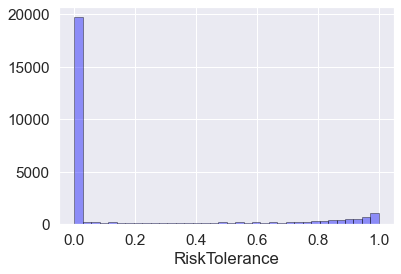

In [78]:
# Looking at the Distribution Plot that include Risk Tolerance < 1.0
sns.distplot(data19['RiskTolerance'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [79]:
# Only considering Risk Tolerance thats more than 0
data19 = data19.loc[~(data19['RiskTolerance'] == 0)]

<AxesSubplot:xlabel='RiskTolerance'>

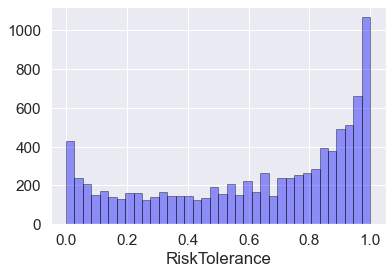

In [80]:
# Looking at the Distribution Plot that do not include Risk Tolerance < 1.0
sns.distplot(data19['RiskTolerance'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

# Feature Selection and Engineering

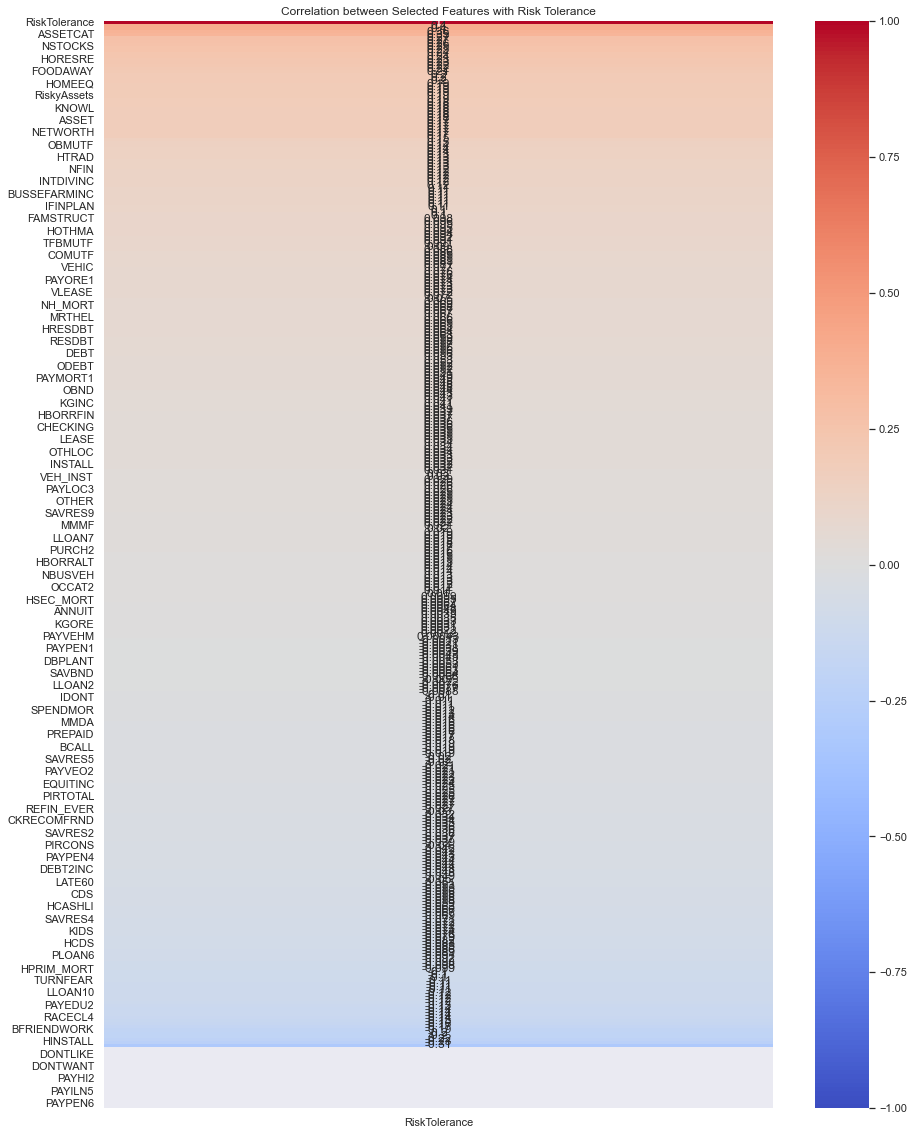

In [81]:
correlation = data19.corr()

plt.figure(figsize=(15,20))
sns.set(font_scale=1)
sns.heatmap(correlation[['RiskTolerance']].sort_values(by=['RiskTolerance'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Correlation between Selected Features with Risk Tolerance');

In [82]:
pd.set_option('display.max_columns', 1000)
data19

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,RiskFreeAssets,RiskyAssets,RiskTolerance
0,1,11,6119.779308,2,75,6,12,4,2,0,1,5,3,1,1,1,1,1,2,10400,3000,0,0.0,67195.781504,1018.117902,0.0,43880.881558,14253.650622,8144.943213,0.0,0.0,67195.781504,2,0,1,0,0,0,0,0,0,0,0,4,2,1,0,0,0,0,6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,6000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000,1,25000,1,0,0,0,0,0,0,0,0,0,0,0,30900.0,317000,0,84000,0,401000,1,33000,0,0,0,33000,1,0,0,0,0,0,0,0,44000,1,0,500000,500000,1,0,0,409900.0,1,0,9900.0,6.100085,1,1,2,1009000,1,4600,1,0,0,1,2,0,0,0,2,0,0,0.0,1100000.0,1,1,0,0,0.0,0,0.0,0.0,0,0,40000,1,1144600.0,1,44600.0,2153600.0,1,0.0,0.0,0,1100000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,2153600.0,0.000000,0.000000,190000.0,0.0,0.0,0.0,0,190000.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0.0,0.0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,5,3,6,3,2,10,6,6,3,3,75000,401000,0.842437
1,1,12,4712.374912,2,75,6,12,4,2,0,1,5,3,1,1,1,1,1,2,10400,3000,0,0.0,57014.602488,1018.117902,0.0,31459.843158,16289.886425,8144.943213,0.0,0.

**Criteria for Feature Selection:**  
1. Since the purpose is to use features that are intuitive and readily available to the average investor  
2. Features that are most overtly determinant of risk tolerance (Age, Financial Standing, Financial Dependants, Time Horizon, etc.)  

**Feature Exploration and Candidacy for Selection**  
- **AGE**: This is an important feature and will be kept. 
Age groups are:   
1.  <35      4.  55-64  
2.  35-44   5.  65-74  
3.  45-54   6.  >=75  
- **EDUC** and **EDCL** (Education): Highest completed grade by reference person and Education category of reference person
- **MARRIED** : Marital status of reference person
- **KIDS** : Total number of children in household
- **OCCAT1** and **OCCAT2**: 	Occupation categories and classifications for reference person
- **NETWORTH** and **NWCAT**: Total net worth of household and Net worth percentile groups
- **INCOME** and **INCCAT**: Total amount of income of household
- **NOFINRISK** and **YSEFINRISK**: Willingness to take risk - 	Respondent not willing to take financial risk and/or Respondent willing to take financial risk
- **SAVING**: Total value of savings accounts held by household

In [83]:
keep_list = ['AGE','EDCL', 'EDUC', 'MARRIED','KIDS','OCCAT1','OCCAT2','INCOME', 'WAGEINC', 'NETWORTH', 'RiskTolerance', 'YESFINRISK',  'NOFINRISK','SAVING']

drop_list = [col for col in data19.columns if col not in keep_list]

data19.drop(labels=drop_list, axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix of Selected Features')

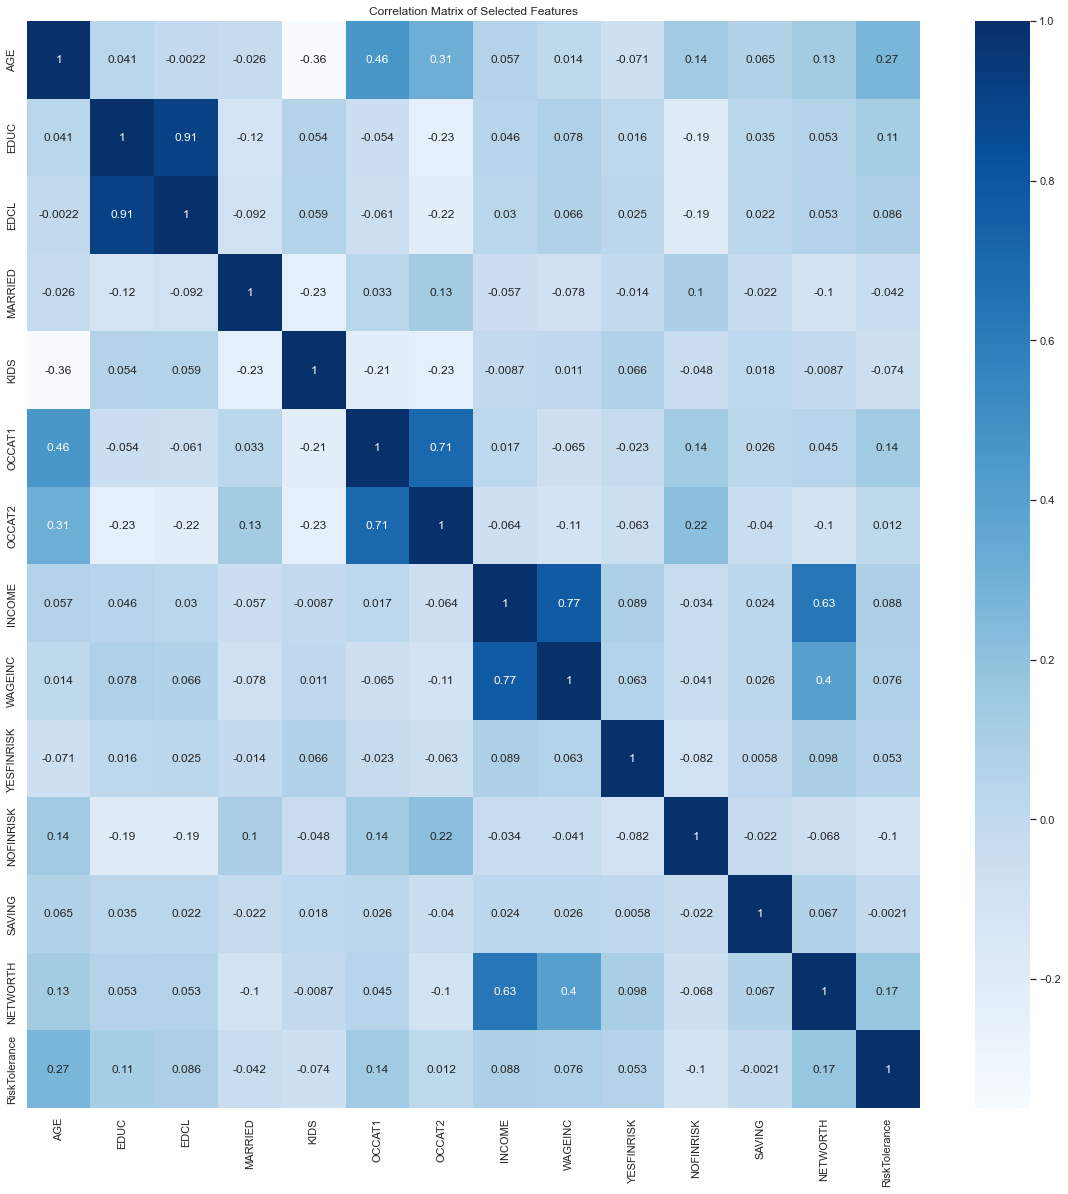

In [84]:
## General view on correlation

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data19.corr(),cmap='Blues',annot=True)
plt.title('Correlation Matrix of Selected Features')

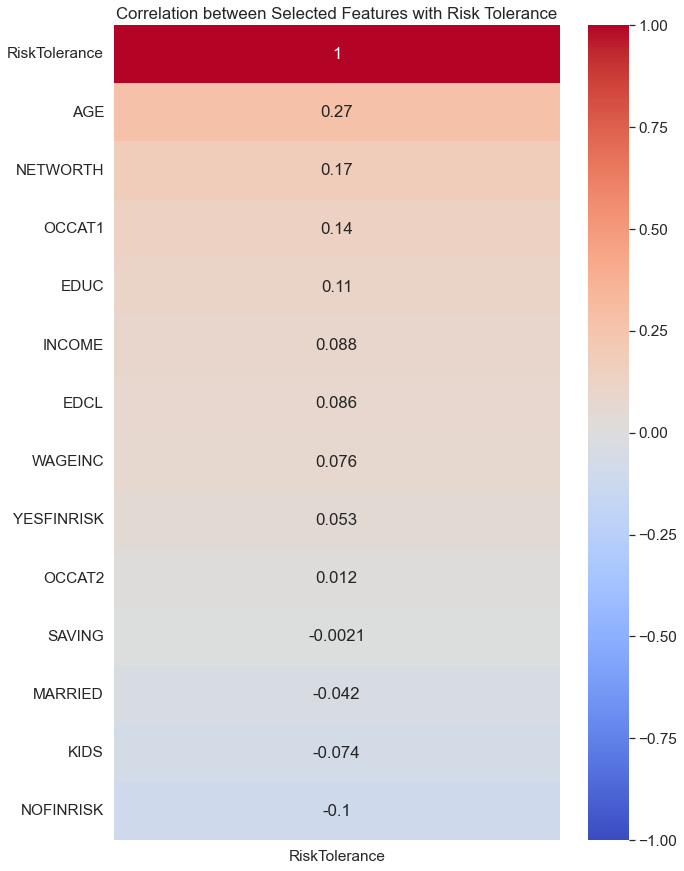

In [85]:
correlation = data19.corr()

plt.figure(figsize=(10,15))
sns.set(font_scale=1.4)
sns.heatmap(correlation[['RiskTolerance']].sort_values(by=['RiskTolerance'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Correlation between Selected Features with Risk Tolerance');

# Model Evaluation

# Train Test Split

In [86]:
# split out validation dataset for the end
Y= data19["RiskTolerance"]
X = data19.loc[:, data19.columns != 'RiskTolerance']
# scaler = StandardScaler().fit(X)
# rescaledX = scaler.transform(X)
validation_size = 0.2
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [87]:
# test options for regression
num_folds = 10
#scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
scoring = 'r2'

In [88]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))
#Ensable Models 
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [89]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.123196 (0.020222)
LASSO: -0.051337 (0.005018)
EN: -0.083224 (0.009672)
KNN: -0.505555 (0.031369)
CART: -0.822625 (0.031811)
SVR: -0.134338 (0.021973)
ABR: -0.220715 (0.024470)
GBR: -0.368284 (0.021778)
RFR: -0.911715 (0.012598)
ETR: -0.958777 (0.008850)


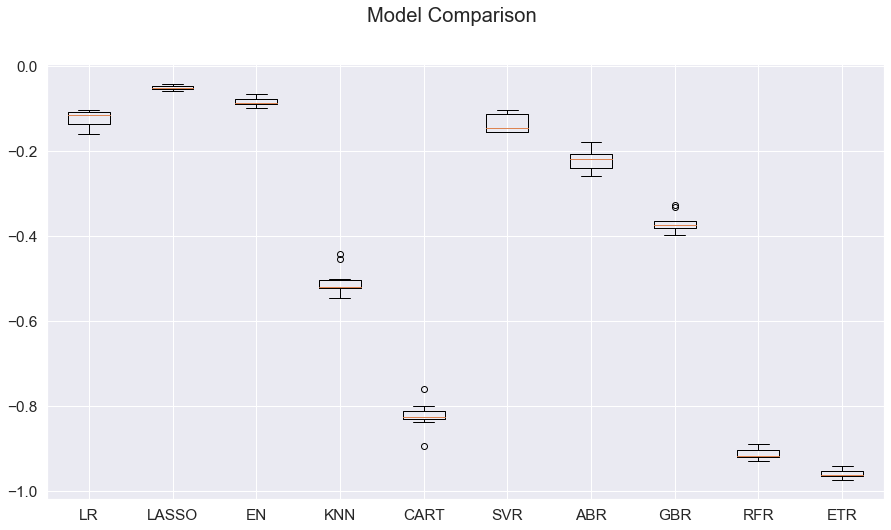

In [90]:
# compare Models
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

The non linear models perform better than the linear models, which means that a non linear relationship between the risk tolerance and the difference variables use to predict it. Given random forest regression is one of the best methods, we use it for further grid search. 

In [91]:
# 8. Grid search : RandomForestRegressor 
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913077 using {'n_estimators': 400}
0.908303 (0.012530) with: {'n_estimators': 50}
0.911536 (0.012354) with: {'n_estimators': 100}
0.912744 (0.012847) with: {'n_estimators': 150}
0.912258 (0.012651) with: {'n_estimators': 200}
0.911776 (0.012916) with: {'n_estimators': 250}
0.912853 (0.011970) with: {'n_estimators': 300}
0.912676 (0.012580) with: {'n_estimators': 350}
0.913077 (0.012512) with: {'n_estimators': 400}


# Results on Test Data

In [98]:
# prepare model
model = RandomForestRegressor(n_estimators = 400)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=400)

In [99]:
from sklearn.metrics import r2_score
predictions_train = model.predict(X_train)
print(r2_score(Y_train, predictions_train))

0.9900570170741526


In [100]:
# estimate accuracy on validation set
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(mean_squared_error(Y_validation, predictions))
print(r2_score(Y_validation, predictions))

0.007462150944229929
0.9282067835691914


[0.13370872 0.04528689 0.01150162 0.01808845 0.03135289 0.01853474
 0.02187783 0.13242908 0.09138333 0.00984198 0.01895054 0.12939825
 0.33764568]


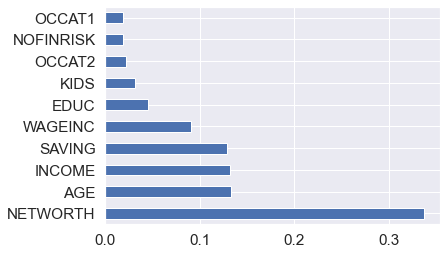

In [101]:
import pandas as pd
import numpy as np
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [96]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model, open(filename, 'wb'))

In [97]:
# load the model from disk
loaded_model = load(open(filename, 'rb'))
# estimate accuracy on validation set
predictions = loaded_model.predict(X_validation)
result = mean_squared_error(Y_validation, predictions)
print(r2_score(Y_validation, predictions))
print(result)

0.9281981431920127
0.007463049020704674
